In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:

dataset = pd.read_csv('LR.csv')
X = dataset.iloc[:,1].values
y = dataset.iloc[:,2].values


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
class LinearRegressor:
    
    def __init__(self,learning_rate = 0.1):
        self.learning_rate = learning_rate
        
    def fit(self,train_dataset,train_y,n_iters):
        self.weight = random.random()
        self.bias = random.random()
        self.train_dataset = train_dataset
        self.train_y = train_y
        self.batch_size = 1
        for _ in range(n_iters):
            for step_i in range((train_y.shape[0]//self.batch_size)):
                self.fit_model(step_i)
                    
    def test_loss(self,test_dataset,test_y):
        
        result =  test_dataset@(np.ones(self.batch_size)*self.weight) + self.bias
        result_loss = np.square(result-test_y).mean()
        return result_loss
    
    def predict(self,X):
        
        return (np.ones(X.shape[0])*self.weight).T@X + self.bias
    
    def get_weights(self):
        
        return self.weight,self.bias
    
    def fit_model(self,step):
        #YOUR CODE HERE
        y_pred = self.train_dataset[self.batch_size*step : self.batch_size*step + self.batch_size]@(np.ones(self.batch_size)*self.weight) + self.bias
        mse_loss_grad = (y_pred-self.train_y[self.batch_size*step : self.batch_size*step + self.batch_size].reshape(self.batch_size,1))/self.batch_size
        self.weight =  self.weight - (self.train_dataset[self.batch_size*step : self.batch_size*step + self.batch_size].T @ mse_loss_grad)*self.learning_rate
        self.bias = self.bias - np.mean((y_pred-self.train_y[self.batch_size*step : self.batch_size*step + self.batch_size].reshape(self.batch_size,1)))*self.learning_rate
        

In [18]:
regressor = LinearRegressor(0.0001)


In [19]:
regressor.fit(X_train,y_train,n_iters = 1)

In [20]:
w,b = regressor.get_weights()
y_pred = [i*w + b for i in range(0,100)]
X_pred = [i for i in range(100)]

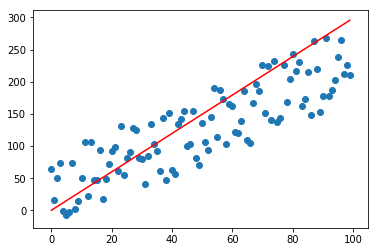

In [21]:
plt.plot(X_pred,y_pred,color = 'red')
plt.scatter(X,y)